## Notebook to explore the implimentation of classification model for fashion mnist

In this notebook, we'll try to impliment CNN model on fashion mnist data.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

2026-02-04 08:53:54.477788: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-04 08:54:20.397175: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-04 08:54:35.234222: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images,training_labels), (testing_images, testing_labels) = mnist.load_data()

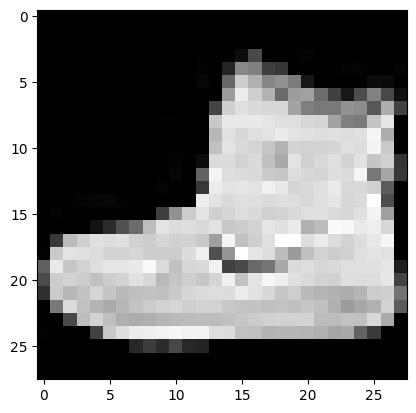

In [5]:
plt.imshow(training_images[0], cmap='gray')

In [6]:
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

## Normalizing the values to 0-1 for easier representation and faster computation.

In [7]:
training_images = training_images / 255.0
testing_images = testing_images / 255.0

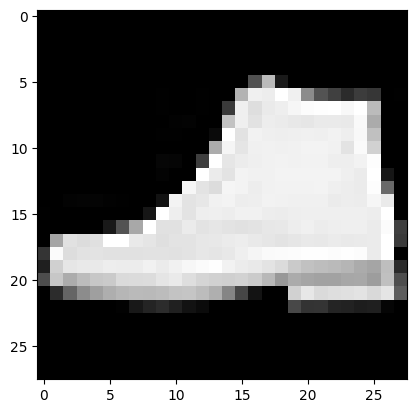

In [8]:
plt.imshow(training_images[42], cmap='gray')

In [9]:
print(training_images[42])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Designing the model

1. Sequential : defines sequences of layers.
2. Flatten : converts a square input into a 1D vector.
3. Dense : Adds layers to the neurons; dense means all inputs are connected to the next layer.
4. Activation: Function that tells the neuron what action to perform. Two kinds:<br>
    - RELU: return x if x is greater than 0, else 0. As in this activation passes either 0 or greater to the next neuron.
    - Softmax: takes a set of values and returns the maximum value.For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0]

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2026-02-04 08:54:53.611680: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Compile and run

After defining the model, we would want to compile and run the model.

We want to use an optimizer and loss function while compiling the model. 
1. *Optimizer*: Controls how the model learns the parameters. Optimizer adjusts the weights to reduce the error. It decides the strategy and speed of adjustment. Ex: Adam optimizer adjusts learning rate per parameter while SDG (Stochastic Gradient Descent) has a global learning rate. The choice of optimizer decides on how quickly and effectively the model converges to a good solution.
2. *Loss function*: This defines what is the model trying to minimize. It's a single number that defines how far off the models predictions are from actual correct values. The optimizer uses this metric to adjust the weights - it adjusts the weights to bring this number down. The right loss function depends on your problem type: for example, categorical_crossentropy for multi-class classification, binary_crossentropy for binary classification, or mean_squared_error for regression.
3. *Metrics*: These define how you evaluate model's performance and doesn't get involved in tweaking the weights while training. It's purely for tracking the model's performance. While the loss function is what get's optimized behind the scenes, metrics gives us more human-readable format of what the performance of the model is and how its progressing.For instance, you might use accuracy as a metric for a classification task — it tells you the percentage of correct predictions, which is easier to interpret than the raw loss value. You can pass multiple metrics to track several aspects of performance simultaneously.

***Quick way to remember: the loss is what gets optimized, the optimizer is the algorithm that does the optimizing, and the metrics are just there to report how things are going.***

In [11]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [12]:
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5


2026-02-04 08:58:28.522412: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8250 - loss: 0.4997
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8652 - loss: 0.3744
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8768 - loss: 0.3362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8854 - loss: 0.3114
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8929 - loss: 0.2927


At each step, you can see two things: accuracy and loss. At the final step its 89% accurate. In other words, its figured out the pattern match between training images and labels that worked 89% of the time.

In [13]:
model.evaluate(testing_images, testing_labels)

 44/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8780 - loss: 0.3715   

2026-02-04 09:23:07.786906: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8740 - loss: 0.3650


[0.3650442957878113, 0.8740000128746033]